In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Platinum_Data.csv')

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/19/2023,"1,083.80","1,059.60","1,084.20","1,055.00",NaN,1.64%
1,05/18/2023,"1,066.30","1,079.20","1,080.80","1,055.00",NaN,-2.24%
2,05/17/2023,"1,090.70","1,067.70","1,086.10","1,067.40",NaN,1.46%
3,05/16/2023,"1,075.00","1,070.50","1,078.70","1,061.80",NaN,-0.72%
4,05/15/2023,"1,082.80","1,057.60","1,079.10","1,057.50",NaN,1.79%
...,...,...,...,...,...,...,...
1553,05/24/2018,910.40,904.60,914.70,903.50,NaN,0.64%
1554,05/23/2018,904.60,908.30,910.40,898.50,NaN,-0.41%
1555,05/22/2018,908.30,899.50,912.00,896.30,NaN,0.98%
1556,05/21/2018,899.50,886.20,902.70,877.80,NaN,1.50%


# PREPROCESSING DATA

In [ ]:
df = df[['Price']]
# Flip the column
df = df.iloc[::-1]

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Drop missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# SPLITTING DATA(7-2-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

In [ ]:
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the  prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted  prices for the next 30 days
print('Predicted Platinum prices for the next 30 days:')
print(y_next_30_days)

Predicted Platinum prices for the next 30 days:
[1220.77420544 1221.06094553 1221.34768563 1221.63442572 1221.92116582
 1222.20790591 1222.49464601 1222.7813861  1223.0681262  1223.35486629
 1223.64160639 1223.92834648 1224.21508658 1224.50182667 1224.78856677
 1225.07530686 1225.36204696 1225.64878705 1225.93552715 1226.22226724
 1226.50900734 1226.79574743 1227.08248753 1227.36922762 1227.65596772
 1227.94270781 1228.22944791 1228.516188   1228.8029281  1229.08966819]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  196.6383113268346
Testing MAE:  177.87817656674676
Testing MAPE:  19.349958634668084
Validation RMSE:  183.92704298711286
Validation MAE:  176.69530482075234
Validation MAPE:  17.59409090214478


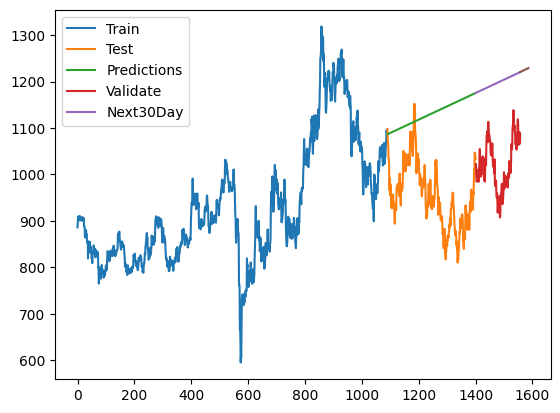

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     608.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.26e-113
Time:                        19:21:15   Log-Likelihood:                -9372.6
No. Observations:                1558   AIC:                         1.875e+04
Df Residuals:                    1556   BIC:                         1.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        836.7446      5.026    166.493      0.0

# SPLITTING DATA(6-3-1)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted prices for the next 30 days
print('Predicted Platinum prices for the next 30 days:')
print(y_next_30_days)

Predicted Platinum prices for the next 30 days:
[1239.16588714 1239.46837928 1239.77087142 1240.07336356 1240.3758557
 1240.67834784 1240.98083997 1241.28333211 1241.58582425 1241.88831639
 1242.19080853 1242.49330067 1242.79579281 1243.09828495 1243.40077709
 1243.70326923 1244.00576137 1244.3082535  1244.61074564 1244.91323778
 1245.21572992 1245.51822206 1245.8207142  1246.12320634 1246.42569848
 1246.72819062 1247.03068276 1247.33317489 1247.63566703 1247.93815917]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  178.02621505601982
Testing MAE:  151.69438900507515
Testing MAPE:  16.145504375827386
Validation RMSE:  200.46427969932594
Validation MAE:  193.84257503231487
Validation MAPE:  19.27655442525059


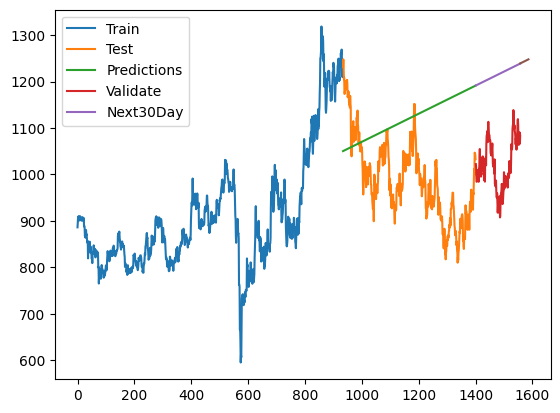

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     608.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.26e-113
Time:                        19:21:15   Log-Likelihood:                -9372.6
No. Observations:                1558   AIC:                         1.875e+04
Df Residuals:                    1556   BIC:                         1.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        836.7446      5.026    166.493      0.0

# SPLITTING DATA(5-3-2)

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the Platinum prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted Platinum prices for the next 30 days
print('Predicted Platinum prices for the next 30 days:')
print(y_next_30_days)

Predicted Platinum prices for the next 30 days:
[965.57359894 965.66083784 965.74807673 965.83531562 965.92255451
 966.0097934  966.09703229 966.18427118 966.27151007 966.35874897
 966.44598786 966.53322675 966.62046564 966.70770453 966.79494342
 966.88218231 966.9694212  967.0566601  967.14389899 967.23113788
 967.31837677 967.40561566 967.49285455 967.58009344 967.66733233
 967.75457123 967.84181012 967.92904901 968.0162879  968.10352679]


In [ ]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  178.47062734072503
Testing MAE:  146.43699132164124
Testing MAPE:  13.040605433411995
Validation RMSE:  72.47241344004354
Validation MAE:  59.955547105399944
Validation MAPE:  6.150969342366398


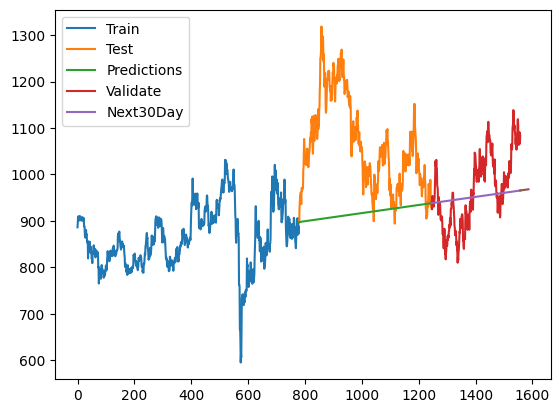

In [ ]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     608.2
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.26e-113
Time:                        19:21:16   Log-Likelihood:                -9372.6
No. Observations:                1558   AIC:                         1.875e+04
Df Residuals:                    1556   BIC:                         1.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        836.7446      5.026    166.493      0.0

# EVALUATING MODEL

---

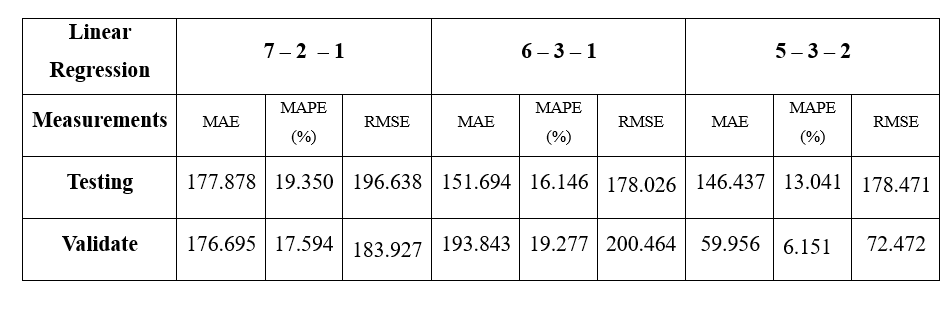